In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from simulation import Load, Submission, Tournament

In [2]:
mw = 'M'
ncaa_files = Load(mw, dir='./input_with_data/')
df = pd.read_csv('./input_with_data/'+mw+'submission.csv')
submission = Submission(sub_df=df, files=ncaa_files)
submission.seasons

array([2021])

In [4]:
tourney = Tournament(files=ncaa_files,submission=submission,season=2021)
tourney.simulate_tournament('chalk') 
tourney.summary_to_df()


,Team,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship,Winner
TeamID,,,,,,,,
1211,X01 - Gonzaga,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1124,Z01 - Baylor,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1228,Y01 - Illinois,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1104,W02 - Alabama,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1116,Z03 - Arkansas,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1222,Y02 - Houston,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1234,X02 - Iowa,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1276,W01 - Michigan,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1437,Z05 - Villanova,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [5]:
tourney.reset_tournament()
tourney.simulate_tournament('random', seed=13) 
tourney.summary_to_df()

,Team,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship,Winner
TeamID,,,,,,,,
1124,Z01 - Baylor,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1104,W02 - Alabama,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1361,Y06 - San Diego St,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1211,X01 - Gonzaga,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1403,Z06 - Texas Tech,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1329,Y04 - Oklahoma St,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1332,X07 - Oregon,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1160,W05 - Colorado,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1457,Z12 - Winthrop,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [8]:
n_sim = 100
results = tourney.simulate_tournaments(n_sim)

In [11]:
odds = results.copy()
odds.iloc[:,1:] = (results.iloc[:,1:]  / n_sim) * 100
odds.head(32)

,Team,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship,Winner
TeamID,,,,,,,,
1211,X01 - Gonzaga,100.0,98.0,87.0,73.0,56.0,39.0,24.0
1124,Z01 - Baylor,100.0,94.0,79.0,67.0,48.0,36.0,21.0
1228,Y01 - Illinois,100.0,95.0,69.0,37.0,29.0,17.0,7.0
1116,Z03 - Arkansas,100.0,83.0,56.0,40.0,24.0,11.0,7.0
1276,W01 - Michigan,100.0,94.0,59.0,38.0,24.0,11.0,6.0
1104,W02 - Alabama,100.0,93.0,77.0,61.0,39.0,13.0,4.0
1234,X02 - Iowa,100.0,94.0,62.0,45.0,17.0,7.0,3.0
1222,Y02 - Houston,100.0,88.0,67.0,52.0,22.0,8.0,2.0
1166,X05 - Creighton,100.0,80.0,55.0,7.0,5.0,3.0,2.0


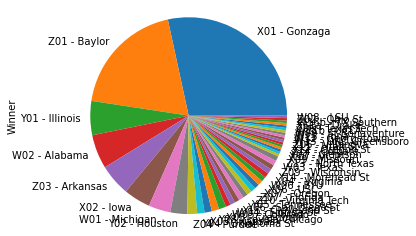

In [ ]:
odds['Winner'].plot(kind='pie')
plt.axis('equal')
plt.show()

In [19]:
odds['win_64'] = odds['Round of 32'] / odds['First Round']
odds['win_32'] = odds['Sweet 16'] / odds['Round of 32']
odds['win_16'] = odds['Elite 8'] / odds['Sweet 16']
odds['win_8'] = odds['Final 4'] / odds['Elite 8']
odds['win_4'] = odds['Championship'] / odds['Final 4']
odds['win_champ'] = odds['Winner'] / odds['Championship']
odds.head(32)


,First Round,Round of 32,Sweet 16,Elite 8,Final 4,Championship,Winner,win_64,win_32,win_16,win_8,win_4,win_champ
X01 - Gonzaga,1.000,0.980,0.908,0.772,0.592,0.448,0.284,0.980000,0.926531,0.850220,0.766839,0.756757,0.633929
Z01 - Baylor,1.000,0.964,0.776,0.644,0.468,0.336,0.192,0.964000,0.804979,0.829897,0.726708,0.717949,0.571429
W02 - Alabama,1.000,0.932,0.760,0.592,0.352,0.112,0.056,0.932000,0.815451,0.778947,0.594595,0.318182,0.500000
Y01 - Illinois,1.000,0.956,0.620,0.356,0.260,0.152,0.056,0.956000,0.648536,0.574194,0.730337,0.584615,0.368421
Z03 - Arkansas,1.000,0.768,0.540,0.384,0.180,0.076,0.048,0.768000,0.703125,0.711111,0.468750,0.422222,0.631579
X02 - Iowa,1.000,0.936,0.604,0.412,0.176,0.076,0.044,0.936000,0.645299,0.682119,0.427184,0.431818,0.578947
W01 - Michigan,1.000,0.932,0.632,0.448,0.256,0.096,0.036,0.932000,0.678112,0.708861,0.571429,0.375000,0.375000
Y02 - Houston,1.000,0.904,0.696,0.504,0.220,0.088,0.028,0.904000,0.769912,0.724138,0.436508,0.400000,0.318182
Z04 - Purdue,1.000,0.560,0.324,0.080,0.036,0.020,0.016,0.560000,0.578571,0.246914,0.450000,0.555556,0.800000
X03 - Kansas,1.000,0.896,0.484,0.232,0.064,0.032,0.012,0.896000,0.540179,0.479339,0.275862,0.500000,0.375000
